In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


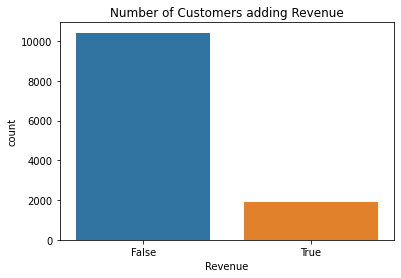

In [3]:
import seaborn as sns

plt.figure()
plt.title('Number of Customers adding Revenue')
sns.countplot(df['Revenue'])
plt.show()

## find nans and clean

In [4]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


- Revenue => class whether it can make a revenue or not
- Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration => represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- Bounce Rate => percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
- Exit Rate => the percentage that were the last in the session
- Page Value => feature represents the average value for a web page that a user visited before completing an e-commerce transaction
- Special Day => indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero,before and after this date unless it is close to another special day, and its maximum value of 1 on February 8
- Operating system,browser, region, traffic type => Different types of operating systems, browser, region and traffic type used to visit the website
- Visitor type => Whether the customer is a returning or new visitor
- Weekend => A Boolean value indicating whether the date of the visit is weekend
- Month => Month of the year

The Administration, Informational and product related features are types of pages, technically they are nominal data. So I guess we impute that data with median, Also before doing that we have the min value as 0(page type as 0 means it should be null value) should also be considered as NaN value, so we convert it into NaN value and impute it.

In [7]:
for cols in ['Administrative','Informational','ProductRelated']:
    df[cols].replace(0, np.nan, inplace= True)

in page durations, we have 0 as the minimum value in duration (time can't be zero). occurs when the page type was 0 which we imputed earlier, so we can convert this into NaN and impute this as well.
Here we don't need to worry about rates zeros. for example bounce rates having 0 values, as there are many such cases where bounce rates can be 0 because the user must have liked the website and moved onto other web pages towards transactions.

In [8]:
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    df[cols].replace(0, np.nan, inplace= True)

In [9]:
df.isna().sum()

Administrative             5768
Administrative_Duration    5903
Informational              9699
Informational_Duration     9925
ProductRelated               38
ProductRelated_Duration     755
BounceRates                   0
ExitRates                     0
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Weekend                       0
Revenue                       0
dtype: int64

Let's check out our numerical feature outliers through boxplot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


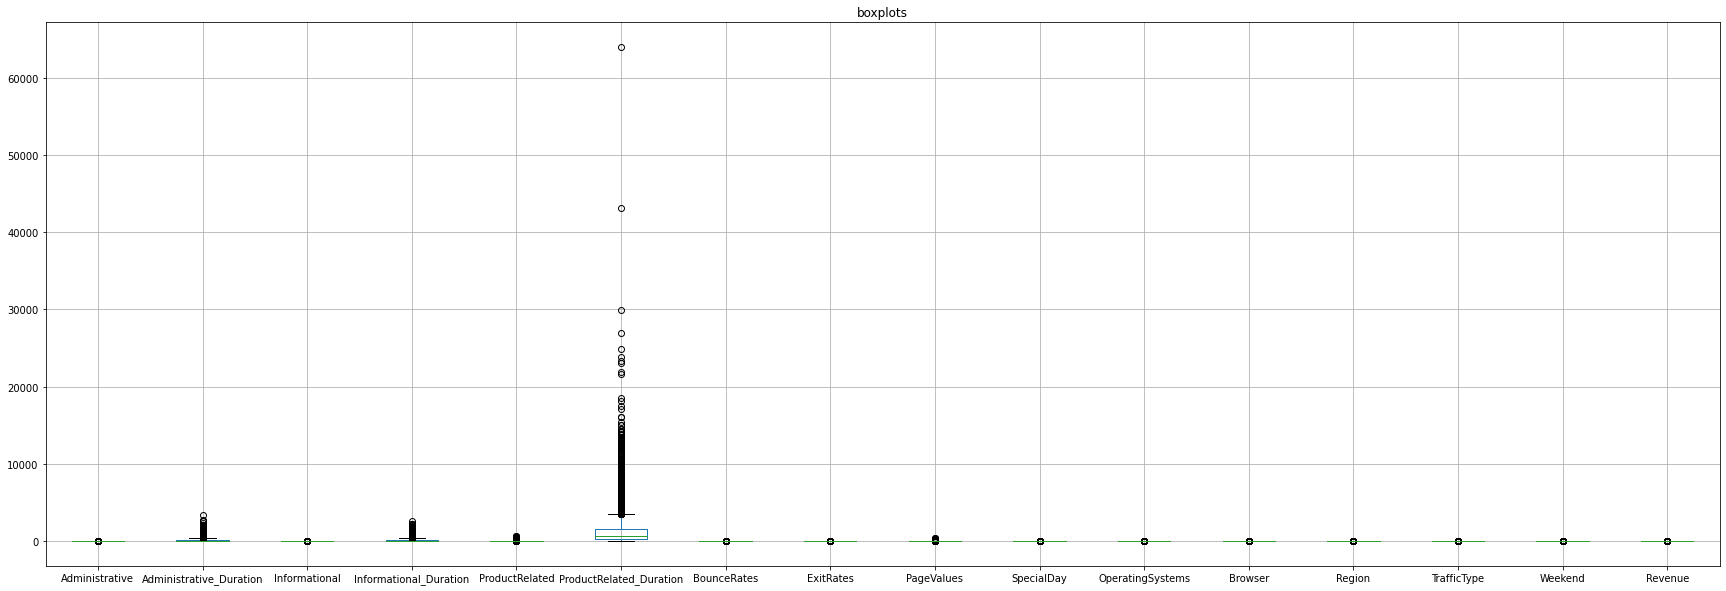

In [10]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.title('boxplots');

skewness

In [11]:
df.skew()

Administrative             1.586495
Administrative_Duration    4.577785
Informational              2.669395
Informational_Duration     3.457944
ProductRelated             4.339583
ProductRelated_Duration    7.209611
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

durations have distribution with skewness and outliers. we can fill them with median.

for finding best way, we compare two possible ways.
- use median
- use regression imputation

for solving imbalanced problem, we use smote and good metrics.

imputation

In [12]:
df["Revenue"] = df["Revenue"].astype(int)
df["Weekend"] = df["Weekend"].astype(int)

We have encoded the required features

In [13]:
from sklearn.preprocessing import LabelEncoder

encoded_features=['Month','VisitorType']

label_encoder = LabelEncoder()
for col in encoded_features:
    df[col] = label_encoder.fit_transform(df[col])
    
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,NaN,NaN,NaN,NaN,1.0,NaN,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,NaN,NaN,NaN,NaN,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,NaN,NaN,NaN,NaN,1.0,NaN,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,NaN,NaN,NaN,NaN,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,NaN,NaN,NaN,NaN,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']

train_col_names = list(trainx.columns.values.tolist())

mice_imputer = IterativeImputer(random_state=42, estimator=lr, 
                                max_iter=10, n_nearest_features=4, imputation_order = 'roman')
trainx = mice_imputer.fit_transform(trainx)

trainx = pd.DataFrame(trainx)

trainx.columns = train_col_names

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [15]:
trainx.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,3.234562,121.754581,1.922694,112.993219,1.0,-329.763134,0.20,0.20,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0
1,3.238387,113.168059,1.907151,109.386916,2.0,64.000000,0.00,0.10,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0
2,3.220034,121.312030,1.921210,96.602867,1.0,-388.731556,0.20,0.20,0.0,0.0,2.0,4.0,1.0,9.0,3.0,2.0,0.0
3,3.215170,109.816822,1.897163,105.813737,2.0,2.666667,0.05,0.14,0.0,0.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0
4,3.472771,133.016134,1.998216,123.465027,10.0,627.500000,0.02,0.05,0.0,0.0,2.0,3.0,3.0,1.0,4.0,2.0,1.0


In [16]:
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler

sm = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
# X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
# X_train = sc.fit_transform(X_svm_smote)

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imbpipeline

random_forest_model = RandomForestClassifier(random_state= 59)

pipeline = imbpipeline(steps = [['smote', sm],
                                ['scaler', sc],
                                ['classifier', random_forest_model]])

scores = cross_val_score(pipeline, trainx,ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.884 accuracy with a standard deviation of 0.025
0.651 f1-score with a standard deviation of 0.075
0.901 auc with a standard deviation of 0.039
-0.308 neg_log_loss with a standard deviation of 0.035


In [18]:
trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']

In [19]:
for cols in ['Administrative','Informational','ProductRelated']:
    median_value=trainx[cols].median()
    trainx[cols]=trainx[cols].fillna(median_value)

In [20]:
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates']:
    mean_value=trainx[cols].median()
    trainx[cols]=trainx[cols].fillna(mean_value)

In [21]:
sm = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
# X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# # X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
# X_train = sc.fit_transform(X_svm_smote)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state= 59)

pipeline = imbpipeline(steps = [['smote', sm],
                                ['scaler', sc],
                                ['classifier', random_forest_model]])

scores = cross_val_score(pipeline, trainx,ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.882 accuracy with a standard deviation of 0.029
0.653 f1-score with a standard deviation of 0.084
0.903 auc with a standard deviation of 0.044
-0.303 neg_log_loss with a standard deviation of 0.051


Based on the classification results of the two imputation methods, the best way to fill nan values ​​is to use median in imputation.

## curse of dimensionality

In [23]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()

# trainx = df

# train_col_names = list(trainx.columns.values.tolist())

# mice_imputer = IterativeImputer(random_state=42, estimator=lr, 
#                                 max_iter=10, n_nearest_features=4, imputation_order = 'roman')
# trainx = mice_imputer.fit_transform(trainx)

# trainx = pd.DataFrame(trainx)

# trainx.columns = train_col_names

In [24]:
for cols in ['Administrative','Informational','ProductRelated']:
    median_value=df[cols].median()
    df[cols]=df[cols].fillna(median_value)

for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates']:
    mean_value=df[cols].median()
    df[cols]=df[cols].fillna(mean_value)

In [25]:
# df = trainx
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [26]:
def vis_list(a, t, y, x):
  plt.figure()
  plt.plot(np.array(range(len(a)))+1,a)
  plt.title(t)
  plt.ylabel(y)
  plt.xlabel(x)
  plt.grid()
  plt.show()

In [27]:
df.shape

(12330, 18)

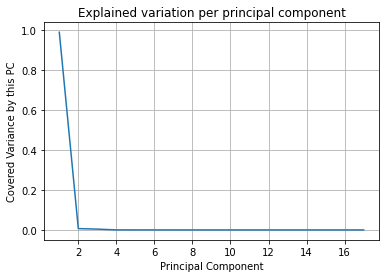

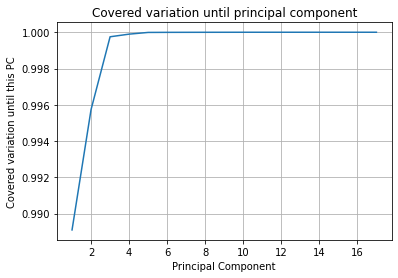

Explained variation per principal component for the first 100 PCs: 
[9.89097392e-01 6.63996032e-03 4.01280125e-03 1.45373749e-04
 9.42859517e-05 4.47817544e-06 1.63150452e-06 1.49869024e-06
 1.24853764e-06 7.90717970e-07 2.06654957e-07 1.44618696e-07
 1.27138319e-07 4.87697323e-08 1.06216624e-08 1.06367287e-09
 5.11714368e-11]


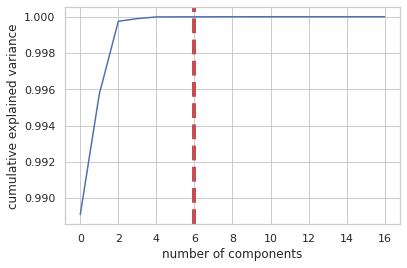

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.989097,9.890974e-01
1,0.995737,6.639960e-03
2,0.999750,4.012801e-03
3,0.999896,1.453737e-04
4,0.999990,9.428595e-05
5,0.999994,4.478175e-06
6,0.999996,1.631505e-06
7,0.999997,1.498690e-06
8,0.999999,1.248538e-06
9,0.999999,7.907180e-07


In [28]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=17)
principalComponents = pca.fit_transform(df.drop(['Revenue'],axis=1))

vis_list(pca.explained_variance_ratio_,\
         "Explained variation per principal component",\
         'Covered Variance by this PC', 'Principal Component')

var_sum = sum(pca.explained_variance_ratio_)

covered = [i/var_sum for i in pca.explained_variance_ratio_]

vis_list(np.cumsum(covered),\
         "Covered variation until principal component",\
         'Covered variation until this PC', 'Principal Component')

print('Explained variation per principal component for the first 100 PCs: \n{}'\
      .format(pca.explained_variance_ratio_[:100]))

plt.figure()
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=6, ymin=0, ymax=1)
display(plt.show())
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

As can be seen, the first 6 pcs cover almost 100% of the variance. That is, with a smaller number of features, all the variance and detailed data information in the main dimension can be obtained. This can indicates the existence of a curse of dimensions and a high number of features.

As the number of attributes increases, we need to increase the number of data exponentially to find the correct answer. This is a curse of dimensions. Dimension reduction methods help us reduce the number of attributes while the amount of data is constant. This reduces the curse. We can find the right answer easier and faster. This also makes it possible to find the right answer in some cases when it was not possible in the initial situation. Reducing the dimension reduces the number of parameters and speeds up training. Data volume also decreases.

##  Feature selection

R^2: 0.9718687583957014
Feature: Administrative, Score: 0.03373
Feature: Administrative_Duration, Score: 0.03877
Feature: Informational, Score: 0.01336
Feature: Informational_Duration, Score: 0.01682
Feature: ProductRelated, Score: 0.03670
Feature: ProductRelated_Duration, Score: 0.04856
Feature: BounceRates, Score: 0.03203
Feature: ExitRates, Score: 0.03844
Feature: PageValues, Score: 0.63013
Feature: SpecialDay, Score: 0.00416
Feature: Month, Score: 0.03136
Feature: OperatingSystems, Score: 0.00917
Feature: Browser, Score: 0.01019
Feature: Region, Score: 0.01453
Feature: TrafficType, Score: 0.01466
Feature: VisitorType, Score: 0.02186
Feature: Weekend, Score: 0.00552


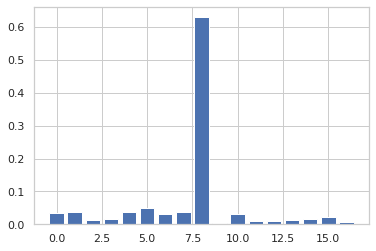

In [29]:
from sklearn.ensemble import RandomForestRegressor
# define dataset
trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']
svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
X_train = sc.fit_transform(X_svm_smote)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_svm_smote)
print('R^2:',model.score(X_train, y_svm_smote))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (trainx.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

top 6 features from most important to least important
- PageValues
- Month
- ProductRelated_Duration
- VisitorType
- Administrative_Duration
- ProductRelated

R^2: 0.9657752125721781
Feature: PageValues, Score: 0.64516
Feature: Month, Score: 0.04376
Feature: ProductRelated_Duration, Score: 0.11619
Feature: VisitorType, Score: 0.02490
Feature: Administrative_Duration, Score: 0.08527
Feature: ProductRelated, Score: 0.08472


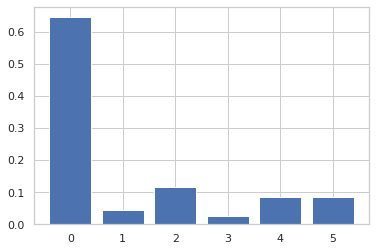

In [30]:
from sklearn.ensemble import RandomForestRegressor
# define dataset
trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']
trainx = trainx.loc[:,['PageValues','Month','ProductRelated_Duration',
                       'VisitorType','Administrative_Duration','ProductRelated']]
svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
X_train = sc.fit_transform(X_svm_smote)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_svm_smote)
print('R^2:',model.score(X_train, y_svm_smote))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (trainx.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Other attributes explain a small percentage of the entire database information. We use the criterion r ^ 2 to calculate the amount of variance coverage and the information contained in the data. With this reduction in dimensions, significant information is not lost. The lack of these features slightly reduces our forecast information and affects the performance of the model. We need to consider whether this negative impact is significant or not. To do this, we must use classification with a common model. You need to see how much the feature reduction reduces the evaluation criterias.

## find best feature reduction

In [31]:
from sklearn.ensemble import RandomForestClassifier
# define dataset
trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']

svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
# X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
# X_train = sc.fit_transform(X_svm_smote)

# define the model
model = RandomForestClassifier()
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', model]])
# fit the model
scores = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.880 accuracy with a standard deviation of 0.028
0.650 f1-score with a standard deviation of 0.087
0.901 auc with a standard deviation of 0.044
-0.317 neg_log_loss with a standard deviation of 0.033


In [32]:
from sklearn.ensemble import RandomForestClassifier
# define dataset
trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']
trainx = trainx.loc[:,['PageValues','Month','ProductRelated_Duration',
                       'VisitorType','Administrative_Duration','ProductRelated']]

svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
# X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
# X_train = sc.fit_transform(X_svm_smote)

# define the model
model = RandomForestClassifier()
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', model]])
# fit the model
scores = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.830 accuracy with a standard deviation of 0.037
0.616 f1-score with a standard deviation of 0.051
0.884 auc with a standard deviation of 0.040
-0.465 neg_log_loss with a standard deviation of 0.062


Using the most important features of the forest reduces the performance of the model, which is a significant reduction. That is, there is useful information in other properties that help us classify.

In [33]:
from sklearn.ensemble import RandomForestClassifier
# define dataset
trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']

svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
# X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
# X_train = sc.fit_transform(X_svm_smote)

pca = PCA(n_components=9)
# pca.fit(X_train)
# X_train_scaled_pca = pca.transform(X_train)

# define the model
model = RandomForestClassifier()
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['pca', pca],
                                ['classifier', model]])

# fit the model
scores = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.795 accuracy with a standard deviation of 0.028
0.478 f1-score with a standard deviation of 0.046
0.800 auc with a standard deviation of 0.027
-0.467 neg_log_loss with a standard deviation of 0.041


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']

svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
# X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
# X_train = sc.fit_transform(X_svm_smote)

lda = LinearDiscriminantAnalysis()
# pca.fit(X_train,y_svm_smote)
# X_train_scaled_pca = pca.transform(X_train)

# define the model
model = RandomForestClassifier()
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['lda', lda],
                                ['classifier', model]])
# fit the model
scores = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.701 accuracy with a standard deviation of 0.025
0.402 f1-score with a standard deviation of 0.017
0.753 auc with a standard deviation of 0.017
-2.586 neg_log_loss with a standard deviation of 0.570


We do not have a curse of dimension. This is because the performance of the fixed model deteriorates with dimensional reduction methods and the performance difference is significant. That is, reducing the large number of dimensions has had a great effect on the performance of the model. If the data has a curse of dimension, by reducing the dimension size of the data, the performance of the model will not decrease significantly and performance may even improve.

The best way to reduce dimension is to not reduce the dimensions.

## find best model

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_pca=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR_pca=LogisticRegression()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc_pca=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_pca=KNeighborsClassifier()

from sklearn.ensemble import AdaBoostClassifier
ada_pca=AdaBoostClassifier(random_state=0)

import lightgbm as lgb
lgbm_pca=lgb.LGBMClassifier(random_state=0)

from xgboost import XGBClassifier
xgb_pca=XGBClassifier(random_state=0)

from sklearn import svm
svc_pca=svm.SVC(random_state=0)

import warnings
warnings.filterwarnings('ignore')

In [36]:
trainx = df.drop(['Revenue'], axis=1)
ty = df['Revenue']

svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
# X_svm_smote, y_svm_smote = svm_smote.fit_resample(trainx,ty)

# X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.20, random_state=101)

sc = StandardScaler()
# X_train = sc.fit_transform(X_svm_smote)

Hyperparameter Tuning of KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

pca_knn_tunned=KNeighborsClassifier()

pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', pca_knn_tunned]])

params={'classifier__n_neighbors':[(i+1)*20 for i in range(4)],
        'classifier__p':[i+1 for i in range(3)]}

rsearch_knn_pca=GridSearchCV(pipeline,params,cv=3,scoring='roc_auc',n_jobs=-1)
# rsearch_knn_pca.get_params().keys()
rsearch_knn_pca.fit(trainx, ty)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=101)],
                                       ['scaler', StandardScaler()],
                                       ['classifier', KNeighborsClassifier()]]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': [20, 40, 60, 80],
                         'classifier__p': [1, 2, 3]},
             scoring='roc_auc')

In [38]:
rsearch_knn_pca.best_params_

{'classifier__n_neighbors': 80, 'classifier__p': 1}

In [39]:
knn_tunned=KNeighborsClassifier(n_neighbors=rsearch_knn_pca.best_params_['classifier__n_neighbors'],
                                p=rsearch_knn_pca.best_params_['classifier__p'])

In [40]:
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', knn_tunned]])
knn_ac = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (knn_ac.mean(), knn_ac.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.827 accuracy with a standard deviation of 0.023
0.516 f1-score with a standard deviation of 0.041
0.834 auc with a standard deviation of 0.026
-0.403 neg_log_loss with a standard deviation of 0.038


Hyperparameter Tuning of SVC

In [41]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

SVM_tunned=svm.SVC(random_state=0)
params = {
          # 'classifier__C': [0.1, 1], 
          # 'classifier__C': [0.01, 0.1, 1, 10, 100], 
          # 'classifier__degree': [3, 6],
          # 'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          # 'classifier__gamma': [1, 0.1, 0.01], 
          # 'classifier__kernel': ['rbf', 'linear', 'poly']}
          'classifier__kernel': ['linear']}

pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', SVM_tunned]])
rsearch_svm=GridSearchCV(pipeline,params,cv=3,scoring='roc_auc',n_jobs=-1)

rsearch_svm.fit(trainx, ty)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=101)],
                                       ['scaler', StandardScaler()],
                                       ['classifier', SVC(random_state=0)]]),
             n_jobs=-1, param_grid={'classifier__kernel': ['linear']},
             scoring='roc_auc')

In [42]:
rsearch_svm.best_params_

{'classifier__kernel': 'linear'}

In [43]:
SVM_tunned=svm.SVC(
    # C=rsearch_svm.best_params_['classifier__C'],
                   kernel=rsearch_svm.best_params_['classifier__kernel'])

In [44]:
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', SVM_tunned]])
svm_ac = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (svm_ac.mean(), svm_ac.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.877 accuracy with a standard deviation of 0.032
0.646 f1-score with a standard deviation of 0.084
0.881 auc with a standard deviation of 0.046
nan neg_log_loss with a standard deviation of nan


Hyperparameter Tuning of Decision Tree

In [45]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

DT_tunned=DecisionTreeClassifier(random_state=0)
params={
        'classifier__max_features':[1,5,10,15,20],
        'classifier__max_depth': [2,6,10,14],
        'classifier__min_samples_split':[1,5,9],
        'classifier__min_samples_leaf':[1,3,5, 6],
        'classifier__criterion':['gini','entropy']}

pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', DT_tunned]])
rsearch_svm=GridSearchCV(pipeline,params,cv=3,scoring='roc_auc',n_jobs=-1)

rsearch_svm.fit(trainx, ty)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=101)],
                                       ['scaler', StandardScaler()],
                                       ['classifier',
                                        DecisionTreeClassifier(random_state=0)]]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [2, 6, 10, 14],
                         'classifier__max_features': [1, 5, 10, 15, 20],
                         'classifier__min_samples_leaf': [1, 3, 5, 6],
                         'classifier__min_samples_split': [1, 5, 9]},
             scoring='roc_auc')

In [46]:
rsearch_svm.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__max_features': 1,
 'classifier__min_samples_leaf': 3,
 'classifier__min_samples_split': 5}

In [47]:
DT_tunned=DecisionTreeClassifier(criterion=rsearch_svm.best_params_['classifier__criterion'],
                   max_depth=rsearch_svm.best_params_['classifier__max_depth'],
                   max_features=rsearch_svm.best_params_['classifier__max_features'],
                   min_samples_leaf=rsearch_svm.best_params_['classifier__min_samples_leaf'],
                   min_samples_split=rsearch_svm.best_params_['classifier__min_samples_split'])

In [48]:
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', DT_tunned]])
dt_ac = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (dt_ac.mean(), dt_ac.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.729 accuracy with a standard deviation of 0.096
0.427 f1-score with a standard deviation of 0.143
0.673 auc with a standard deviation of 0.056
-0.603 neg_log_loss with a standard deviation of 0.134


Hyperparameter Tuning of LR

In [49]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

lr_tunned=LogisticRegression(random_state=0)
params={
        'classifier__C':[0.01,0.1,1,10,100],
        'classifier__penalty': ['l1', 'l2', 'elasticnet']
        }

pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', lr_tunned]])
rsearch_svm=GridSearchCV(pipeline,params,cv=3,scoring='roc_auc',n_jobs=-1)

rsearch_svm.fit(trainx, ty)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=101)],
                                       ['scaler', StandardScaler()],
                                       ['classifier',
                                        LogisticRegression(random_state=0)]]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [50]:
rsearch_svm.best_params_

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}

In [51]:
lr_tunned=LogisticRegression(C=rsearch_svm.best_params_['classifier__C'],
                             penalty=rsearch_svm.best_params_['classifier__penalty'])

In [52]:
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', lr_tunned]])
lr_ac = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (lr_ac.mean(), lr_ac.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.837 accuracy with a standard deviation of 0.031
0.570 f1-score with a standard deviation of 0.056
0.854 auc with a standard deviation of 0.034
-0.451 neg_log_loss with a standard deviation of 0.060


Hyperparameter Tuning of mlp

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

mlp_tunned=MLPClassifier(random_state=0)
params={
        'classifier__activation':['logistic', 'tanh', 'relu'],
        'classifier__hidden_layer_sizes': [(100),(100,100)]
        }

pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', mlp_tunned]])
rsearch_svm=GridSearchCV(pipeline,params,cv=3,scoring='roc_auc',n_jobs=-1)

rsearch_svm.fit(trainx, ty)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=101)],
                                       ['scaler', StandardScaler()],
                                       ['classifier',
                                        MLPClassifier(random_state=0)]]),
             n_jobs=-1,
             param_grid={'classifier__activation': ['logistic', 'tanh', 'relu'],
                         'classifier__hidden_layer_sizes': [100, (100, 100)]},
             scoring='roc_auc')

In [54]:
rsearch_svm.best_params_

{'classifier__activation': 'logistic',
 'classifier__hidden_layer_sizes': (100, 100)}

In [55]:
mlp_tunned=MLPClassifier(activation=rsearch_svm.best_params_['classifier__activation'],
                             hidden_layer_sizes=rsearch_svm.best_params_['classifier__hidden_layer_sizes'])

In [56]:
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', mlp_tunned]])
mlp_ac = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (mlp_ac.mean(), mlp_ac.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.864 accuracy with a standard deviation of 0.038
0.636 f1-score with a standard deviation of 0.086
0.880 auc with a standard deviation of 0.054
-0.373 neg_log_loss with a standard deviation of 0.086


draw bar plot of models accuracy

In [70]:
accs_l = [knn_ac, svm_ac, lr_ac, mlp_ac, dt_ac]

ms = []
ss = []

for i in accs_l:
  m, s = (i.mean(), i.std())
  ms.append(m)
  ss.append(s)

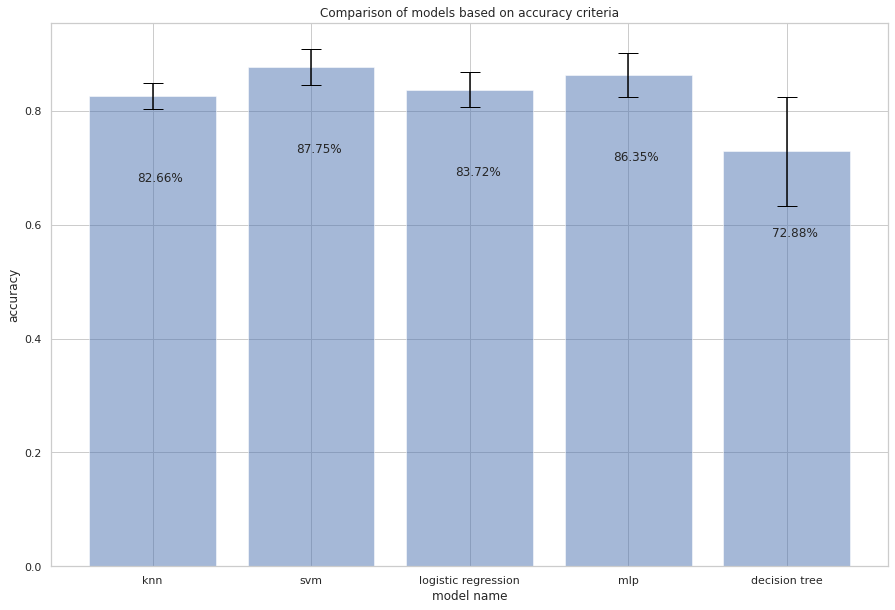

In [95]:
fig, ax = plt.subplots(figsize=(15,10))
gg = ax.bar(range(len(ms)), ms, yerr=ss, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(list(range(len(ms))))
ax.set_xticklabels(['knn', 'svm', 'logistic regression', 'mlp', 'decision tree'])

i = 0
for p in gg:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width-0.35,
             y+height-0.15,
             str(round(100*ms[i],2))+'%',
             ha='center')
    i += 1

plt.xlabel('model name')
plt.ylabel('accuracy')
plt.title('Comparison of models based on accuracy criteria')
plt.show()

model with better performance

In [57]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

RF_tunned=RandomForestClassifier(random_state=0)
# params={'classifier__n_estimators':[5, 20],
#         'classifier__max_features':[1,5,10,15,20],
#         'classifier__max_depth': [2,6,10,14],
#         'classifier__min_samples_split':[1,5,9],
#         'classifier__min_samples_leaf':[1,3,5],
#         'classifier__criterion':['gini','entropy']}

# pipeline = imbpipeline(steps = [['smote', svm_smote],
#                                 ['scaler', sc],
#                                 ['classifier', RF_tunned]])
# rsearch_svm=GridSearchCV(pipeline,params,cv=3,scoring='roc_auc',n_jobs=-1)

# rsearch_svm.fit(trainx, ty)

In [58]:
# rsearch_svm.best_params_

In [59]:
# rf_tunned=RandomForestClassifier(n_estimators=rsearch_svm.best_params_['classifier__n_estimators'],
#                    criterion=rsearch_svm.best_params_['classifier__criterion'],
#                    max_depth=rsearch_svm.best_params_['classifier__max_depth'],
#                    max_features=rsearch_svm.best_params_['classifier__max_features'],
#                    min_samples_leaf=rsearch_svm.best_params_['classifier__min_samples_leaf'],
#                    min_samples_split=rsearch_svm.best_params_['classifier__min_samples_split'])

In [60]:
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', RF_tunned]])
rf_b_ac = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (rf_b_ac.mean(), rf_b_ac.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.883 accuracy with a standard deviation of 0.028
0.657 f1-score with a standard deviation of 0.084
0.902 auc with a standard deviation of 0.043
-0.316 neg_log_loss with a standard deviation of 0.032


In [66]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

XGB_tunned=XGBClassifier(random_state=0)

# params = {
#         # 'classifier__min_child_weight': [2,6,10],
#         # 'classifier__gamma': [0.5, 1, 1.5, 2, 5],
#         # 'classifier__subsample': [0.6, 0.8, 1.0],
#         # 'classifier__colsample_bytree': [0.6, 0.8, 1.0],
#         'classifier__max_depth': [2,6,10]
#         }

pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', XGB_tunned]])
rsearch_svm=GridSearchCV(pipeline,params,cv=3,scoring='roc_auc',n_jobs=-1)

rsearch_svm.fit(trainx, ty)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=101)],
                                       ['scaler', StandardScaler()],
                                       ['classifier', XGBClassifier()]]),
             n_jobs=-1, param_grid={'classifier__max_depth': [2, 6, 10]},
             scoring='roc_auc')

In [67]:
# rsearch_svm.best_params_

In [68]:
# XGB_tunned=XGBClassifier(max_depth=2, random_state=0)

In [69]:
pipeline = imbpipeline(steps = [['smote', svm_smote],
                                ['scaler', sc],
                                ['classifier', XGB_tunned]])
xgb_ac = cross_val_score(pipeline, trainx, ty, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (xgb_ac.mean(), xgb_ac.std()))
scores = cross_val_score(pipeline, trainx,ty, cv=5, scoring='f1')
print("%0.3f f1-score with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='roc_auc')
print("%0.3f auc with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(pipeline, trainx, ty, cv=5, scoring='neg_log_loss')
print("%0.3f neg_log_loss with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.873 accuracy with a standard deviation of 0.034
0.650 f1-score with a standard deviation of 0.091
0.897 auc with a standard deviation of 0.040
-0.308 neg_log_loss with a standard deviation of 0.054
